In [17]:
# Import libraries

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import datetime as dt

## 2022 shootings data

In [112]:
# Read in data
shootings_2022 = pd.read_csv("shootings_2022.csv")

In [113]:
shootings_2022.head()

,Date,State,Dead,Injured,Total,Description
0,05/06/2022,South Carolina,0,4,4,Four people were injured in a drive-by shootin...
1,05/06/2022,Michigan,3,2,5,Three people were killed and two others wounde...
2,05/06/2022,Arizona,2,2,4,Two people were killed and two others injured ...
3,05/06/2022,Tennessee,2,12,14,"2022 Chattanooga shooting: Fourteen were shot,..."
4,05/06/2022,Michigan,1,3,4,One person was killed and three others injured...


In [114]:
# Remove descriptions
shootings_2022 = shootings_2022[["Date", "State", "Dead", "Injured", "Total"]]
shootings_2022.head()

,Date,State,Dead,Injured,Total
0,05/06/2022,South Carolina,0,4,4
1,05/06/2022,Michigan,3,2,5
2,05/06/2022,Arizona,2,2,4
3,05/06/2022,Tennessee,2,12,14
4,05/06/2022,Michigan,1,3,4


In [115]:
# Convert the dates so they're all consistent
shootings_2022["Date"] = pd.to_datetime(shootings_2022["Date"], format = '%d/%m/%Y') 
shootings_2022.head()

,Date,State,Dead,Injured,Total
0,2022-06-05,South Carolina,0,4,4
1,2022-06-05,Michigan,3,2,5
2,2022-06-05,Arizona,2,2,4
3,2022-06-05,Tennessee,2,12,14
4,2022-06-05,Michigan,1,3,4


In [124]:
shootings_2022_counts = shootings_2022["Date"].value_counts()
shootings_2022_counts.head()

2022-01-01    8
2022-06-04    7
2022-05-29    7
2022-04-16    7
2022-04-17    7
Name: Date, dtype: int64

Text(0.5, 0, 'Date')

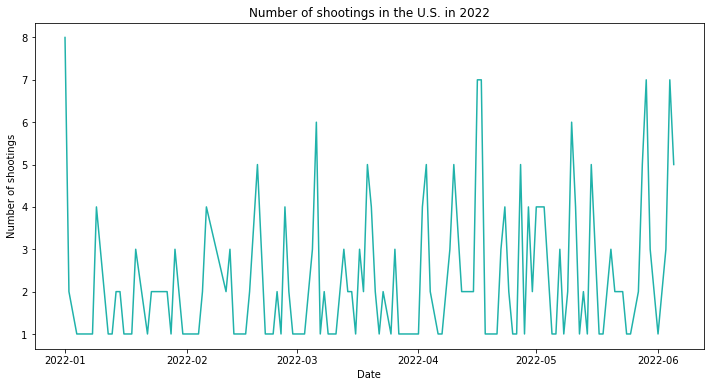

In [132]:
plt.figure(figsize = (12, 6))

sns.lineplot(data = shootings_2022_counts, color = "lightseagreen")

plt.title("Number of shootings in the U.S. in 2022")

plt.ylabel("Number of shootings")

plt.xlabel("Date")

In [116]:
# Group by date in case some shootings occurred on the same day
shootings_2022_time = shootings_2022.groupby(["Date"]).sum()
shootings_2022_time.head()

,Dead,Injured,Total
Date,,,
2022-01-01,7,28,35
2022-01-02,4,4,8
2022-01-04,1,3,4
2022-01-08,1,3,4
2022-01-09,4,17,21


Text(0, 0.5, 'Total number of people injured or dead')

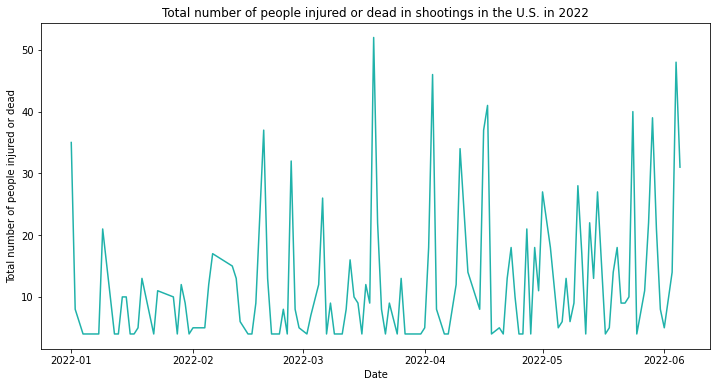

In [220]:
plt.figure(figsize = (12, 6))

sns.lineplot(x = "Date", y = "Total", data = shootings_2022_time, color = "lightseagreen")

plt.title("Total number of people injured or dead in shootings in the U.S. in 2022")

plt.ylabel("Total number of people injured or dead")

In [174]:
# Group by state for number of shootings (observations)
shootings_2022_state_counts = shootings_2022.groupby(["State"]).count()
shootings_2022_state_counts.head()

,Date,Dead,Injured,Total
State,,,,
Alabama,9,9,9,9
Arizona,7,7,7,7
Arkansas,5,5,5,5
California,24,24,24,24
Colorado,6,6,6,6


In [178]:
# Sort by "Total"
shootings_2022_state_counts = shootings_2022_state_counts.sort_values("Total", ascending = False)
shootings_2022_state_counts.head()

,Date,Dead,Injured,Total
State,,,,
Texas,29,29,29,29
California,24,24,24,24
Louisiana,17,17,17,17
Illinois,17,17,17,17
Georgia,15,15,15,15


Text(0, 0.5, 'Number of shootings')

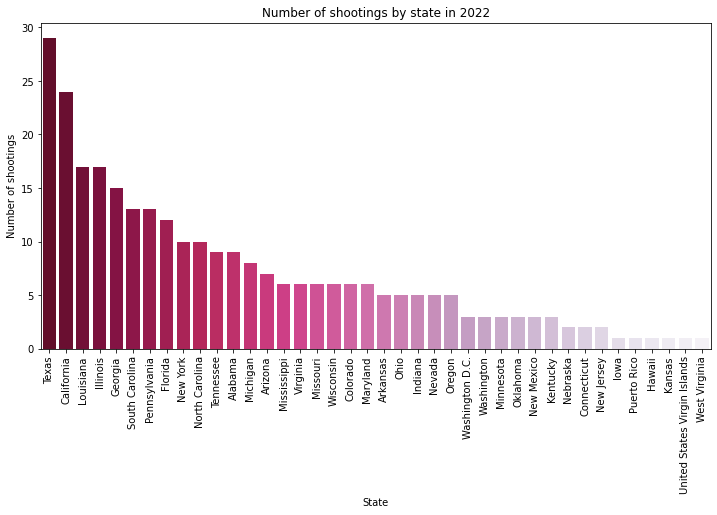

In [194]:
plt.figure(figsize = (12, 6))

# We used y = Date because that's how many times an observation (shooting) occurred for each state
sns.barplot(x = shootings_2022_state_counts.index, y = "Date", data = shootings_2022_state_counts, palette = "PuRd_r")

plt.xticks(rotation = 90)

plt.title("Number of shootings by state in 2022")

plt.ylabel("Number of shootings")

In [139]:
# Group by state
shootings_2022_state = shootings_2022.groupby(["State"]).sum()
shootings_2022_state.head()

,Dead,Injured,Total
State,,,
Alabama,8,35,43
Arizona,6,37,43
Arkansas,8,35,43
California,37,94,131
Colorado,8,17,25


In [150]:
# Sort by "Total"
shootings_2022_state = shootings_2022_state.sort_values("Total", ascending = False)
shootings_2022_state.head()

,Dead,Injured,Total
State,,,
Texas,54,135,189
California,37,94,131
Louisiana,11,80,91
Illinois,12,74,86
South Carolina,9,68,77


Text(0, 0.5, 'Total number of people injured or dead')

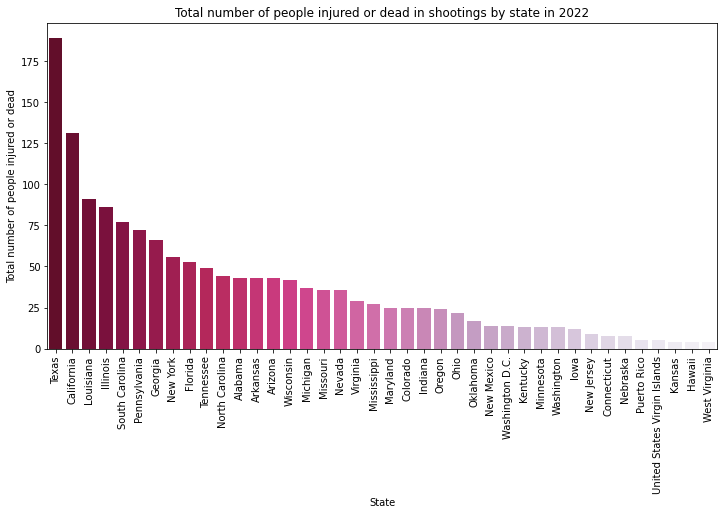

In [168]:
plt.figure(figsize = (12, 6))

sns.barplot(x = shootings_2022_state.index, y = "Total", data = shootings_2022_state, palette = "PuRd_r")

plt.xticks(rotation = 90)

plt.title("Total number of people injured or dead in shootings by state in 2022")

plt.ylabel("Total number of people injured or dead")

## 2018-2022 shootings data

In [201]:
# Read in data
shootings_2021 = pd.read_csv("shootings_2021.csv")
shootings_2020 = pd.read_csv("shootings_2020.csv")
shootings_2019 = pd.read_csv("shootings_2019.csv")
shootings_2018 = pd.read_csv("shootings_2018.csv")

# Clean data
shootings_2021 = shootings_2021[["Date", "State", "Dead", "Injured", "Total"]]
shootings_2020 = shootings_2020[["Date", "State", "Dead", "Injured", "Total"]]
shootings_2019 = shootings_2019[["Date", "State", "Dead", "Injured", "Total"]]
shootings_2018 = shootings_2018[["Date", "State", "Dead", "Injured", "Total"]]

shootings_2021["Date"] = pd.to_datetime(shootings_2021["Date"], format = '%d/%m/%Y') 
shootings_2020["Date"] = pd.to_datetime(shootings_2020["Date"], format = '%d/%m/%Y') 
shootings_2019["Date"] = pd.to_datetime(shootings_2019["Date"], format = '%d/%m/%Y') 
shootings_2018["Date"] = pd.to_datetime(shootings_2018["Date"], format = '%d/%m/%Y') 

In [202]:
shootings_2021.head()

,Date,State,Dead,Injured,Total
0,2021-12-31,Maryland,0,4,4
1,2021-12-31,California,0,6,6
2,2021-12-31,Mississippi,4,3,7
3,2021-12-30,Pennsylvania,0,6,6
4,2021-12-30,Missouri,2,2,4


In [203]:
shootings_2020.head()

,Date,State,Dead,Injured,Total
0,2020-12-31,Indiana,1,3,4
1,2020-12-31,Oregon,0,4,4
2,2020-12-27,United States Virgin Islands,0,4,4
3,2020-12-26,Massachusetts,1,5,6
4,2020-12-26,Illinois,3,3,6


In [204]:
shootings_2019.head()

,Date,State,Dead,Injured,Total
0,2019-12-29,Texas,3,0,3
1,2019-12-29,California,0,5,5
2,2019-12-29,Illinois,0,5,5
3,2019-12-29,New York,1,3,4
4,2019-12-27,Texas,2,7,9


In [205]:
shootings_2018.head()

,Date,State,Dead,Injured,Total
0,2018-12-31,Ohio,3,2,5
1,2018-12-29,Ohio,1,3,4
2,2018-12-28,Missouri,4,1,5
3,2018-12-24,Louisiana,2,2,4
4,2018-12-23,Missouri,0,7,7


In [208]:
# Combine all datasets
all_data = pd.concat([shootings_2018, shootings_2019, shootings_2020, shootings_2021, shootings_2022])
all_data

,Date,State,Dead,Injured,Total
0,2018-12-31,Ohio,3,2,5
1,2018-12-29,Ohio,1,3,4
2,2018-12-28,Missouri,4,1,5
3,2018-12-24,Louisiana,2,2,4
4,2018-12-23,Missouri,0,7,7
...,...,...,...,...,...
279,2022-01-01,Georgia,1,3,4
280,2022-01-01,Wisconsin,1,3,4
281,2022-01-01,Indiana,0,4,4
282,2022-01-01,Colorado,2,2,4


In [210]:
# Number of shootings 2018-2022

shooting_counts = all_data["Date"].value_counts()
shooting_counts

2020-07-05    16
2021-07-04    11
2020-05-23     9
2020-06-20     9
2021-06-20     8
              ..
2019-08-08     1
2019-08-07     1
2020-01-02     1
2020-01-04     1
2018-12-31     1
Name: Date, Length: 1102, dtype: int64

Text(0.5, 0, 'Date')

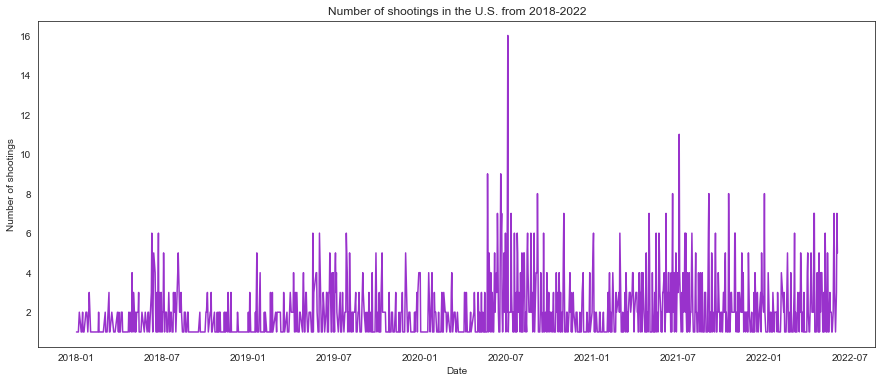

In [388]:
# Number of shootings 2018-2022

plt.figure(figsize = (15, 6))

sns.lineplot(data = shooting_counts, color = "darkorchid", ci = None)

plt.title("Number of shootings in the U.S. from 2018-2022")

plt.ylabel("Number of shootings")

plt.xlabel("Date")

In [218]:
# Total number of injuries and deaths 2018-2022
shootings_time = all_data.groupby(["Date"]).sum()
shootings_time.head()

,Dead,Injured,Total
Date,,,
2018-01-01,1,3,4
2018-01-04,1,3,4
2018-01-05,0,6,6
2018-01-07,1,9,10
2018-01-11,2,2,4


Text(0, 0.5, 'Total number of people injured or dead')

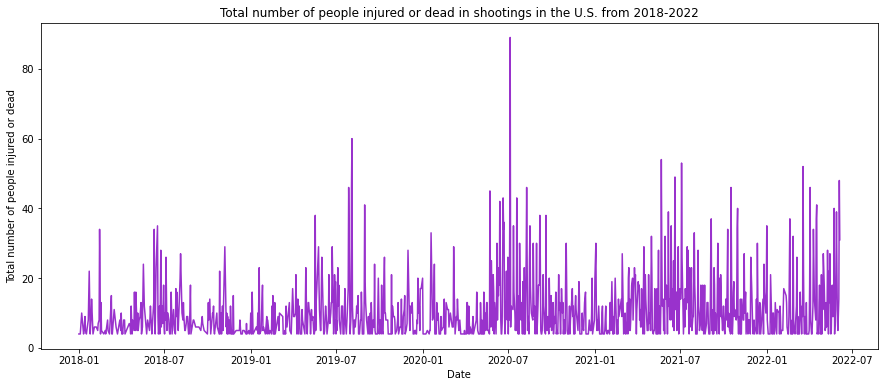

In [223]:
# Total number of injuries and deaths 2018-2022

plt.figure(figsize = (15, 6))

sns.lineplot(x = "Date", y = "Total", data = shootings_time, color = "darkorchid", ci = None)

plt.title("Total number of people injured or dead in shootings in the U.S. from 2018-2022")

plt.ylabel("Total number of people injured or dead")

In [225]:
# Number of shootings by state 2018-2022

# Group by state for number of shootings (observations)
shootings_state_counts = all_data.groupby(["State"]).count()
shootings_state_counts.head()

# Sort by "Total"
shootings_state_counts = shootings_state_counts.sort_values("Total", ascending = False)
shootings_state_counts.head()

,Date,Dead,Injured,Total
State,,,,
Illinois,249,249,249,249
California,185,185,185,185
Texas,177,177,177,177
Florida,125,125,125,125
Pennsylvania,113,113,113,113


Text(0, 0.5, 'Number of shootings')

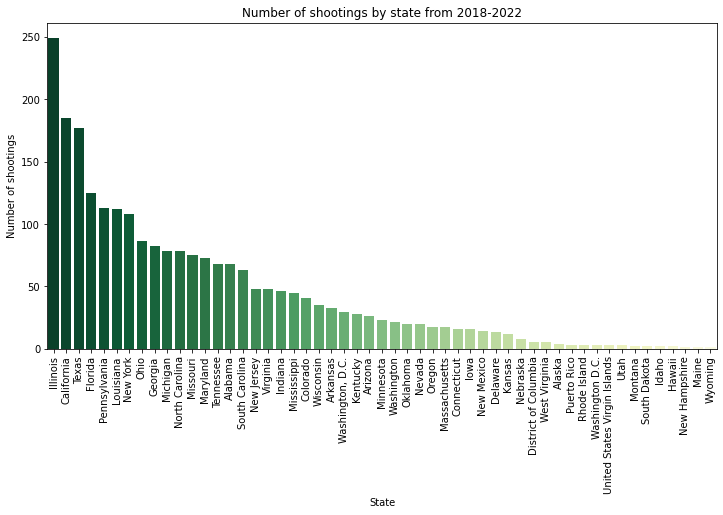

In [228]:
plt.figure(figsize = (12, 6))

# We used y = Date because that's how many times an observation (shooting) occurred for each state
sns.barplot(x = shootings_state_counts.index, y = "Date", data = shootings_state_counts, palette = "YlGn_r")

plt.xticks(rotation = 90)

plt.title("Number of shootings by state from 2018-2022")

plt.ylabel("Number of shootings")

In [230]:
# Total number injured or dead 2018-2022

# Group by state
shootings_state = all_data.groupby(["State"]).sum()
shootings_state.head()

# Sort by "Total"
shootings_state = shootings_state.sort_values("Total", ascending = False)
shootings_state.head()

,Dead,Injured,Total
State,,,
Illinois,171,1089,1260
Texas,272,737,1009
California,243,730,973
Florida,145,516,661
Louisiana,90,475,565


Text(0, 0.5, 'Total number of people injured or dead')

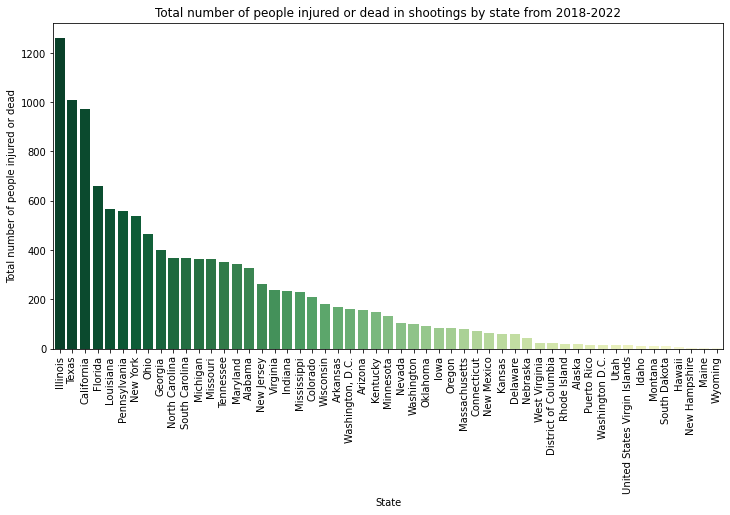

In [231]:
plt.figure(figsize = (12, 6))

sns.barplot(x = shootings_state.index, y = "Total", data = shootings_state, palette = "YlGn_r")

plt.xticks(rotation = 90)

plt.title("Total number of people injured or dead in shootings by state from 2018-2022")

plt.ylabel("Total number of people injured or dead")

In [238]:
# Number of shootings by year

data = {"Year": [2018, 2019, 2020, 2021, 2022],
        "Shootings": [shootings_2018.shape[0], shootings_2019.shape[0], shootings_2020.shape[0], shootings_2021.shape[0], shootings_2022.shape[0]]}

shootings_by_year = pd.DataFrame(data)

shootings_by_year

# Note: 2022 is as of 6/5/22

,Year,Shootings
0,2018,322
1,2019,441
2,2020,615
3,2021,694
4,2022,284


Text(0.5, -0.25, 'Note: the number of shootings for 2022 is updated as of June 5, 2022')

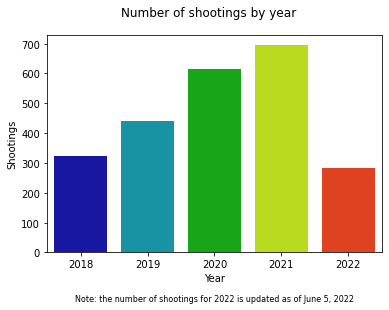

In [255]:
sns.barplot(x = shootings_by_year["Year"], y = shootings_by_year["Shootings"], palette = "nipy_spectral")

plt.suptitle("Number of shootings by year")

plt.title("Note: the number of shootings for 2022 is updated as of June 5, 2022",
         y = -0.25, fontsize = 8)

In [262]:
# Investigating the top 10 states where shootings took place 2018-2022
 
# Group by state for number of shootings (observations)
shootings_2018_state_counts = shootings_2018.groupby(["State"]).count()
shootings_2018_state_counts.head()

# Sort by "Total"
shootings_2018_state_counts = shootings_2018_state_counts.sort_values("Total", ascending = False)
shootings_2018_state_counts.head(10)

,Date,Dead,Injured,Total
State,,,,
Illinois,34,34,34,34
California,33,33,33,33
Florida,28,28,28,28
Pennsylvania,18,18,18,18
Tennessee,17,17,17,17
Texas,15,15,15,15
Missouri,14,14,14,14
Alabama,12,12,12,12
Louisiana,12,12,12,12


In [263]:
# Group by state for number of shootings (observations)
shootings_2019_state_counts = shootings_2019.groupby(["State"]).count()
shootings_2019_state_counts.head()

# Sort by "Total"
shootings_2019_state_counts = shootings_2019_state_counts.sort_values("Total", ascending = False)
shootings_2019_state_counts.head(10)

,Date,Dead,Injured,Total
State,,,,
California,44,44,44,44
Illinois,41,41,41,41
Texas,40,40,40,40
Louisiana,23,23,23,23
Maryland,21,21,21,21
Florida,20,20,20,20
Georgia,19,19,19,19
Pennsylvania,18,18,18,18
Ohio,16,16,16,16


In [264]:
# Group by state for number of shootings (observations)
shootings_2020_state_counts = shootings_2020.groupby(["State"]).count()
shootings_2020_state_counts.head()

# Sort by "Total"
shootings_2020_state_counts = shootings_2020_state_counts.sort_values("Total", ascending = False)
shootings_2020_state_counts.head(10)

,Date,Dead,Injured,Total
State,,,,
Illinois,70,70,70,70
New York,39,39,39,39
California,38,38,38,38
Texas,36,36,36,36
Florida,34,34,34,34
Pennsylvania,30,30,30,30
Louisiana,29,29,29,29
Ohio,23,23,23,23
Missouri,23,23,23,23


In [265]:
# Group by state for number of shootings (observations)
shootings_2021_state_counts = shootings_2021.groupby(["State"]).count()
shootings_2021_state_counts.head()

# Sort by "Total"
shootings_2021_state_counts = shootings_2021_state_counts.sort_values("Total", ascending = False)
shootings_2021_state_counts.head(10)

,Date,Dead,Injured,Total
State,,,,
Illinois,87,87,87,87
Texas,57,57,57,57
California,46,46,46,46
New York,39,39,39,39
Pennsylvania,34,34,34,34
Louisiana,31,31,31,31
Ohio,31,31,31,31
Florida,31,31,31,31
Michigan,27,27,27,27


In [266]:
shootings_2022_state_counts.head(10)

,Date,Dead,Injured,Total
State,,,,
Texas,29,29,29,29
California,24,24,24,24
Louisiana,17,17,17,17
Illinois,17,17,17,17
Georgia,15,15,15,15
South Carolina,13,13,13,13
Pennsylvania,13,13,13,13
Florida,12,12,12,12
New York,10,10,10,10


In [267]:
# Number of shootings 2018-2022
shootings_state_counts.head(10)

,Date,Dead,Injured,Total
State,,,,
Illinois,249,249,249,249
California,185,185,185,185
Texas,177,177,177,177
Florida,125,125,125,125
Pennsylvania,113,113,113,113
Louisiana,112,112,112,112
New York,108,108,108,108
Ohio,86,86,86,86
Georgia,82,82,82,82


In [303]:
# Select the top 10 countries from 2018-2022 from each dataset

subset_2018 = shootings_2018_state_counts[
    (shootings_2018_state_counts.index == "Illinois") |
    (shootings_2018_state_counts.index == "California") |
    (shootings_2018_state_counts.index == "Texas") |
    (shootings_2018_state_counts.index == "Florida") |
    (shootings_2018_state_counts.index == "Pennsylvania") |
    (shootings_2018_state_counts.index == "Louisiana") |
    (shootings_2018_state_counts.index == "New York") |
    (shootings_2018_state_counts.index == "Ohio") |
    (shootings_2018_state_counts.index == "Georgia") |
    (shootings_2018_state_counts.index == "Michigan") 
]

subset_2019 = shootings_2019_state_counts[
    (shootings_2019_state_counts.index == "Illinois") |
    (shootings_2019_state_counts.index == "California") |
    (shootings_2019_state_counts.index == "Texas") |
    (shootings_2019_state_counts.index == "Florida") |
    (shootings_2019_state_counts.index == "Pennsylvania") |
    (shootings_2019_state_counts.index == "Louisiana") |
    (shootings_2019_state_counts.index == "New York") |
    (shootings_2019_state_counts.index == "Ohio") |
    (shootings_2019_state_counts.index == "Georgia") |
    (shootings_2019_state_counts.index == "Michigan") 
]

subset_2020 = shootings_2020_state_counts[
    (shootings_2020_state_counts.index == "Illinois") |
    (shootings_2020_state_counts.index == "California") |
    (shootings_2020_state_counts.index == "Texas") |
    (shootings_2020_state_counts.index == "Florida") |
    (shootings_2020_state_counts.index == "Pennsylvania") |
    (shootings_2020_state_counts.index == "Louisiana") |
    (shootings_2020_state_counts.index == "New York") |
    (shootings_2020_state_counts.index == "Ohio") |
    (shootings_2020_state_counts.index == "Georgia") |
    (shootings_2020_state_counts.index == "Michigan") 
]

subset_2021 = shootings_2021_state_counts[
    (shootings_2021_state_counts.index == "Illinois") |
    (shootings_2021_state_counts.index == "California") |
    (shootings_2021_state_counts.index == "Texas") |
    (shootings_2021_state_counts.index == "Florida") |
    (shootings_2021_state_counts.index == "Pennsylvania") |
    (shootings_2021_state_counts.index == "Louisiana") |
    (shootings_2021_state_counts.index == "New York") |
    (shootings_2021_state_counts.index == "Ohio") |
    (shootings_2021_state_counts.index == "Georgia") |
    (shootings_2021_state_counts.index == "Michigan") 
]

subset_2022 = shootings_2022_state_counts[
    (shootings_2022_state_counts.index == "Illinois") |
    (shootings_2022_state_counts.index == "California") |
    (shootings_2022_state_counts.index == "Texas") |
    (shootings_2022_state_counts.index == "Florida") |
    (shootings_2022_state_counts.index == "Pennsylvania") |
    (shootings_2022_state_counts.index == "Louisiana") |
    (shootings_2022_state_counts.index == "New York") |
    (shootings_2022_state_counts.index == "Ohio") |
    (shootings_2022_state_counts.index == "Georgia") |
    (shootings_2022_state_counts.index == "Michigan") 
]

In [304]:
subset_2018.insert(4, "Year", [2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018], True)
subset_2019.insert(4, "Year", [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019], True)
subset_2020.insert(4, "Year", [2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020], True)
subset_2021.insert(4, "Year", [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], True)
subset_2022.insert(4, "Year", [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022], True)

In [306]:
subset_2018 = subset_2018[["Date", "Year"]]
subset_2019 = subset_2019[["Date", "Year"]]
subset_2020 = subset_2020[["Date", "Year"]]
subset_2021 = subset_2021[["Date", "Year"]]
subset_2022 = subset_2022[["Date", "Year"]]

In [343]:
shootings_top10 = pd.concat([subset_2018, subset_2019, subset_2020, subset_2021, subset_2022])
shootings_top10.tail()

,Date,Year
State,,
Pennsylvania,13,2022
Florida,12,2022
New York,10,2022
Michigan,8,2022
Ohio,5,2022


In [344]:
shootings_top10 = shootings_top10.groupby(["Year", "State"]).sum()
shootings_top10 = pd.DataFrame(shootings_top10)
shootings_top10

Date
Year State             
2018 California      33
     Florida         28
     Georgia          7
     Illinois        34
     Louisiana       12
     Michigan         9
     New York        11
     Ohio            11
     Pennsylvania    18
     Texas           15
2019 California      44
     Florida         20
     Georgia         19
     Illinois        41
     Louisiana       23
     Michigan        12
     New York         9
     Ohio            16
     Pennsylvania    18
     Texas           40
2020 California      38
     Florida         34
     Georgia         17
     Illinois        70
     Louisiana       29
     Michigan        22
     New York        39
     Ohio            23
     Pennsylvania    30
     Texas           36
2021 California      46
     Florida         31
     Georgia         24
     Illinois        87
     Louisiana       31
     Michigan        27
     New York        39
     Ohio            31
     Pennsylvania    34
     Texas           57
2022 California      24
     Florida         12
     Georgia         15
     Illinois        17
     Louisiana       17
     Michigan         8
     New York        10
     Ohio             5
     Pennsylvania    13
     Texas           29

In [348]:
shootings_top10 = shootings_top10.groupby(["Year", "State"]).sum().reset_index()
shootings_top10 = pd.DataFrame(shootings_top10)
shootings_top10

,Year,State,Date
0,2018,California,33
1,2018,Florida,28
2,2018,Georgia,7
3,2018,Illinois,34
4,2018,Louisiana,12
5,2018,Michigan,9
6,2018,New York,11
7,2018,Ohio,11
8,2018,Pennsylvania,18
9,2018,Texas,15


Text(0.5, 1.0, 'Number of shootings from 2018-2022 among the top 10 states')

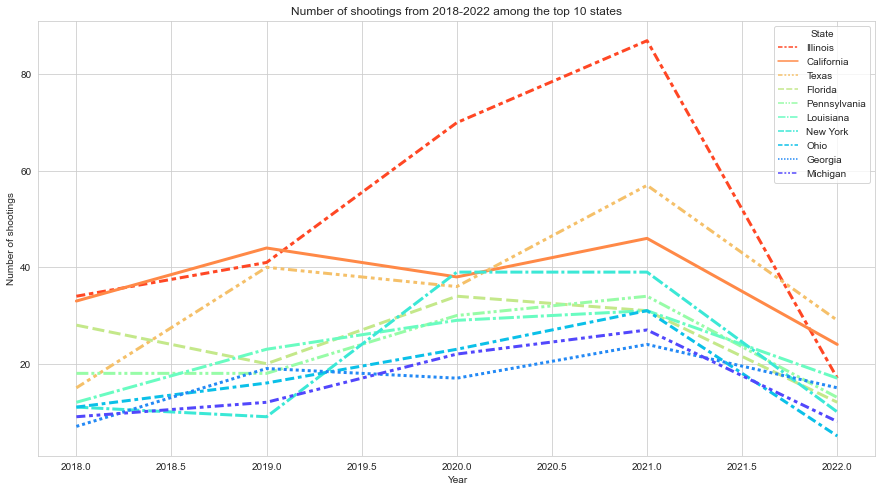

In [381]:
sns.set_style("whitegrid")

plt.figure(figsize = (15, 8))

hue_order = ["Illinois", "California", "Texas", "Florida", "Pennsylvania", "Louisiana", "New York", "Ohio", "Georgia", "Michigan"]

sns.lineplot(x = "Year", y = "Date", data = shootings_top10, hue = "State", style = "State", hue_order = hue_order, palette = "rainbow_r", linewidth = 3)

plt.xlabel("Year")

plt.ylabel("Number of shootings")

plt.title("Number of shootings from 2018-2022 among the top 10 states")